<a href="https://colab.research.google.com/github/LW068/Bettys-Cloud-Dodger/blob/main/supervised_learning/time_series/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Modules

In [1]:
#!/usr/bin/env python3

import os
import zipfile
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# preprocess_data.py Code:

In [3]:
#!/usr/bin/env python3

import os
import zipfile
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# loading data
bitstamp_raw_data = pd.read_csv(os.path.join('/content/sample_data/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv'))
coinbase_raw_data = pd.read_csv(os.path.join('/content/sample_data/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv'))

# checking if loaded correctly
print("Bitstamp Data Loaded:")
print(bitstamp_raw_data.head())
print("Shape:", bitstamp_raw_data.shape)
print("\nCoinbase Data Loaded:")
print(coinbase_raw_data.head())
print("Shape:", coinbase_raw_data.shape)

# dropping NaN values
bitstamp_raw_data = bitstamp_raw_data.dropna()
coinbase_raw_data = coinbase_raw_data.dropna()
# checking if dropped correctly
print("NaN Values Dropped Correctly.")

def preprocess_data(df, filename):
   # drop rows with NaN values
   df = df.dropna(subset=['Close'])

   # select the column to predict
   data_to_use = df['Close'].values

   # reshape the data
   data_to_use = np.reshape(data_to_use, (-1, 1))

   # normalize the data
   scaler = MinMaxScaler()
   data_to_use = scaler.fit_transform(data_to_use)

   # save preprocessed data to a file
   np.save(filename, data_to_use)

# preprocess data
preprocess_data(bitstamp_raw_data, 'bitstamp_preprocessed_data_v2.npy')
preprocess_data(coinbase_raw_data, 'coinbase_preprocessed_data_v2.npy')

# Load preprocessed data
bitstamp_preprocessed_data_v2 = np.load('bitstamp_preprocessed_data_v2.npy')
coinbase_preprocessed_data_v2 = np.load('coinbase_preprocessed_data_v2.npy')

# Check for NaN values in the preprocessed data
print("Checking for NaN values in preprocessed data...")
print("Bitstamp preprocessed data has NaN values:", np.isnan(bitstamp_preprocessed_data_v2).any())
print("Coinbase preprocessed data has NaN values:", np.isnan(coinbase_preprocessed_data_v2).any())

# Print preprocessed data
print(bitstamp_preprocessed_data_v2)
print(coinbase_preprocessed_data_v2)

Bitstamp Data Loaded:
    Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
Shape: (3533411, 8)

Coinbase Data Loaded:
    Timestamp   Open   High    Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1417411980  300.0  300.0  300.0  300.0          0.01                3.0   
1  1417412040    NaN    NaN    NaN    NaN           NaN                NaN   
2  1417412100    NaN    NaN    NaN    NaN           NaN                NaN   
3  1417412160    NaN    NaN    NaN    NaN           

# forecast_btc.py Code (24hr time window):

Number of features: 1
Data loaded successfully.
Datasets created successfully.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1781 (6.96 KB)
Trainable params: 1781 (6.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 20)                1760      
                                                                 
 dense_1 (Dense)             (None, 1)                 

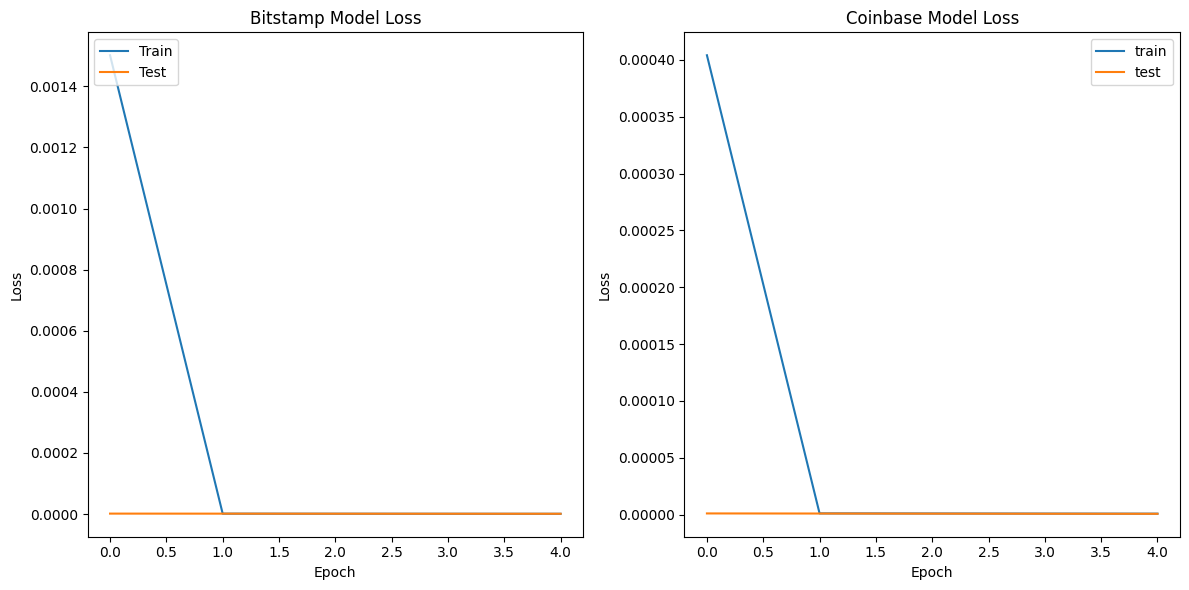

Models saved successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
#!/usr/bin/env python3

import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Masking
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load preprocessed data
bitstamp_data = np.load('/content/bitstamp_preprocessed_data_v2.npy')
coinbase_data = np.load('/content/coinbase_preprocessed_data_v2.npy')

# calculating the number of features
n = bitstamp_data.shape[1]
print(f"Number of features: {n}")

# printing a message to confirm that the data has been loaded:
print("Data loaded successfully.")

# prepare data for LSTM
# so this is assuming each time step uses 24 hours of data
def prepare_data(data, timesteps):
   X, Y = [], []
   for i in range(len(data)-timesteps-1):
       X.append(data[i:(i+timesteps), :])
       Y.append(data[i+timesteps, 0]) # we only predictign the close price
   return np.array(X), np.array(Y)

timesteps = 24
bitstamp_X, bitstamp_y = prepare_data(bitstamp_data, timesteps)
coinbase_X, coinbase_y = prepare_data(coinbase_data, timesteps)

# splitting the data into a training set and a validation set
bitstamp_X_train, bitstamp_X_val, bitstamp_y_train, bitstamp_y_val = train_test_split(bitstamp_X, bitstamp_y, test_size=0.2)
coinbase_X_train, coinbase_X_val, coinbase_y_train, coinbase_y_val = train_test_split(coinbase_X, coinbase_y, test_size=0.2)

# creating the datasets
bitstamp_train_dataset = tf.data.Dataset.from_tensor_slices((bitstamp_X_train, bitstamp_y_train))
bitstamp_val_dataset = tf.data.Dataset.from_tensor_slices((bitstamp_X_val, bitstamp_y_val))

coinbase_train_dataset = tf.data.Dataset.from_tensor_slices((coinbase_X_train, coinbase_y_train))
coinbase_val_dataset = tf.data.Dataset.from_tensor_slices((coinbase_X_val, coinbase_y_val))

# printing a message to confirm that the datasets have been created:
print("Datasets created successfully.")

# defning LSTM model
def create_model():
    model = Sequential()
    model.add(LSTM(20, activation='tanh', input_shape=(timesteps, n)))
    model.add(Dense(1))

    # Custom Adam optimizer with a lower learning rate
    adam_optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)

    # Compile the model with the custom optimizer
    model.compile(optimizer=adam_optimizer, loss='mse')

    model.summary()
    return model

# Creating and training models
bitstamp_model = create_model()
coinbase_model = create_model()

# Model training
bitstamp_history = bitstamp_model.fit(bitstamp_train_dataset.batch(256), epochs=5, validation_data=bitstamp_val_dataset.batch(256), verbose=1)
coinbase_history = coinbase_model.fit(coinbase_train_dataset.batch(256), epochs=5, validation_data=coinbase_val_dataset.batch(256), verbose=1)

# printing the training and validation loss and accuracy:
print(bitstamp_model.history.history)

# plotting the training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bitstamp_history.history['loss'])
plt.plot(bitstamp_history.history['val_loss'])
plt.title('Bitstamp Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# plotting the training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(coinbase_history.history['loss'], label='train')
plt.plot(coinbase_history.history['val_loss'], label='test')
plt.title('Coinbase Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# saving the models
bitstamp_model.save('bitstamp_model_v2.h5')
coinbase_model.save('coinbase_model_v2.h5')

# printing a message to confirm that the models have been saved!!
print("Models saved successfully!")

# More Plotting

12442/12442 [==============================] - 49s 4ms/step


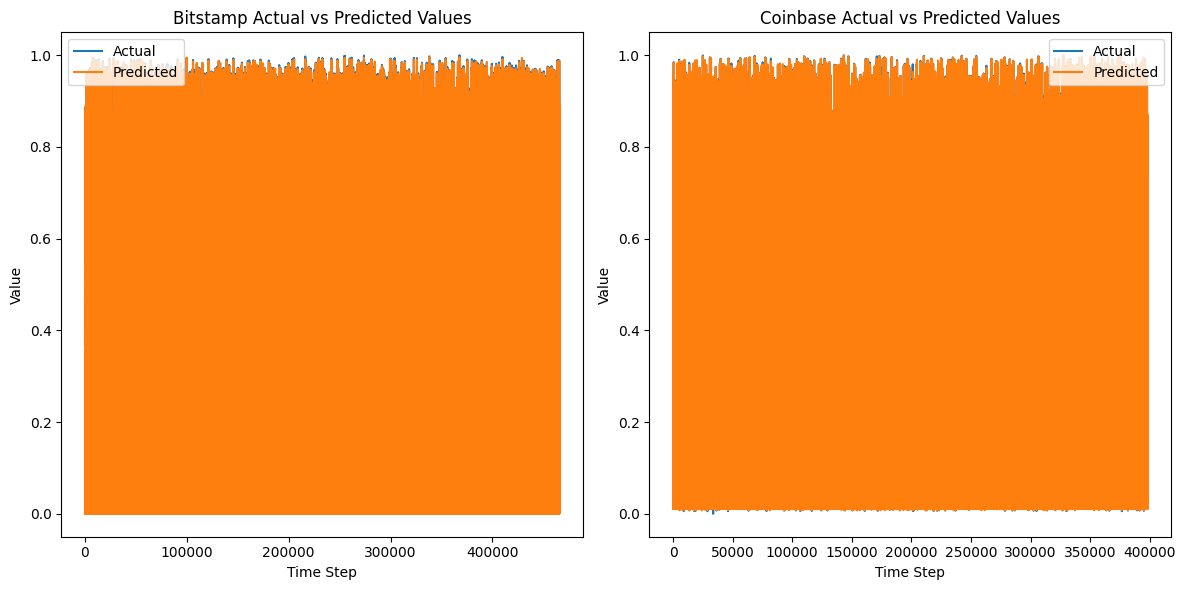

In [5]:
bitstamp_model = keras.models.load_model('bitstamp_model_v2.h5')
coinbase_model = keras.models.load_model('coinbase_model_v2.h5')

# Get the actual and predicted values
bitstamp_actual_values = bitstamp_y_val
bitstamp_predicted_values = bitstamp_model.predict(bitstamp_X_val)

coinbase_actual_values = coinbase_y_val
coinbase_predicted_values = coinbase_model.predict(coinbase_X_val)

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bitstamp_actual_values, label='Actual')
plt.plot(bitstamp_predicted_values, label='Predicted')
plt.title('Bitstamp Actual vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(coinbase_actual_values, label='Actual')
plt.plot(coinbase_predicted_values, label='Predicted')
plt.title('Coinbase Actual vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

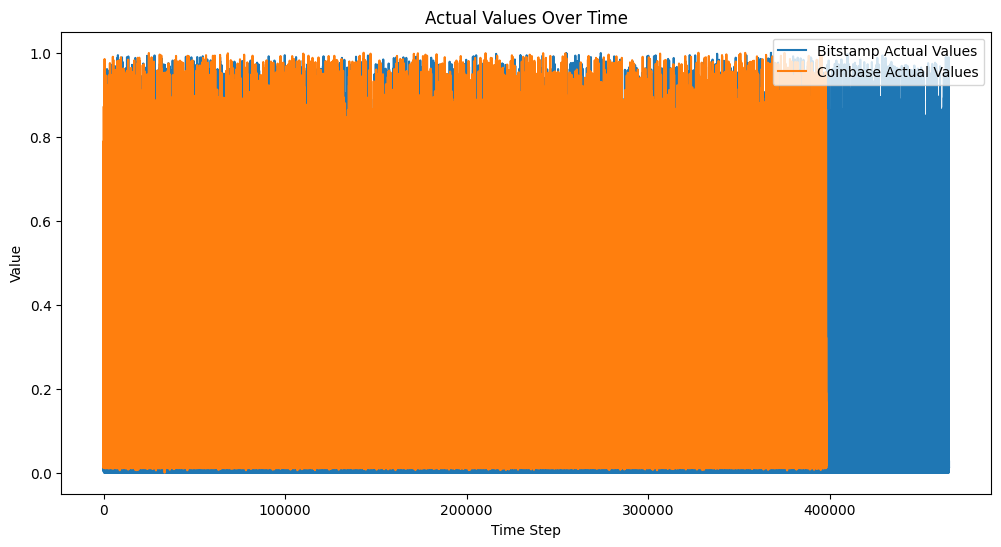

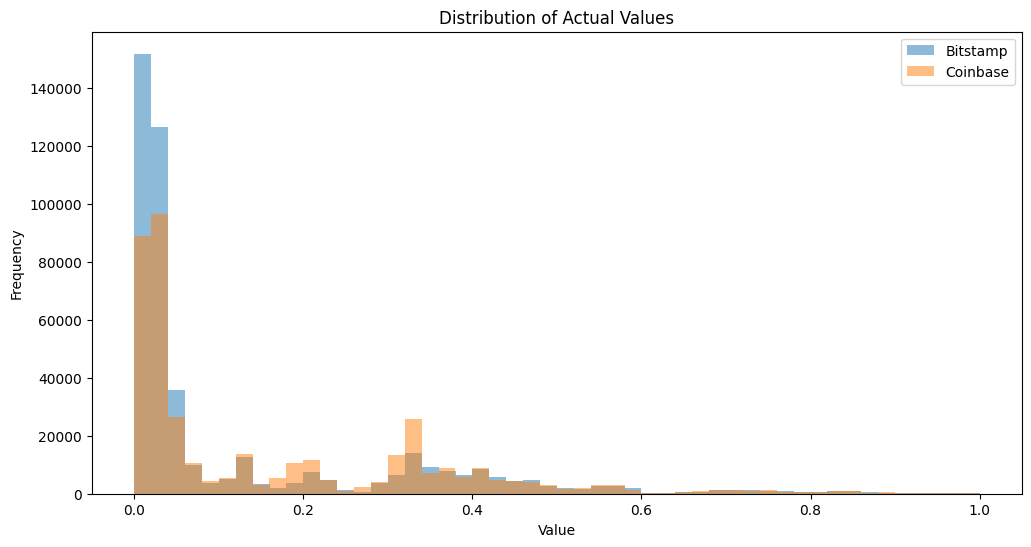

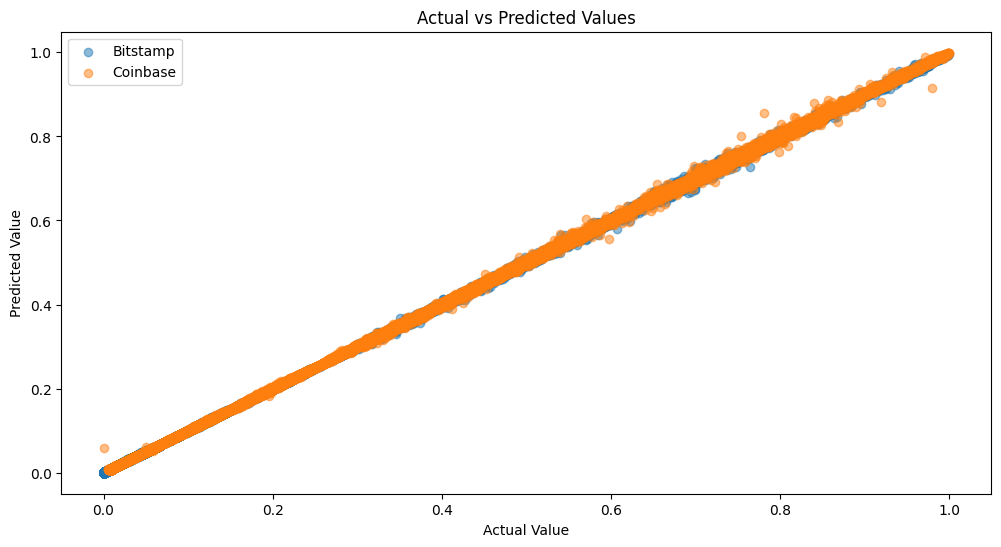

In [6]:
# Plot the actual values over time
plt.figure(figsize=(12, 6))
plt.plot(bitstamp_actual_values, label='Bitstamp Actual Values')
plt.plot(coinbase_actual_values, label='Coinbase Actual Values')
plt.title('Actual Values Over Time')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot a histogram of the actual values
plt.figure(figsize=(12, 6))
plt.hist(bitstamp_actual_values, bins=50, alpha=0.5, label='Bitstamp')
plt.hist(coinbase_actual_values, bins=50, alpha=0.5, label='Coinbase')
plt.title('Distribution of Actual Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Plot a scatter plot of the actual and predicted values
plt.figure(figsize=(12, 6))
plt.scatter(bitstamp_actual_values, bitstamp_predicted_values, alpha=0.5, label='Bitstamp')
plt.scatter(coinbase_actual_values, coinbase_predicted_values, alpha=0.5, label='Coinbase')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()


# forecast_btc.py Code (60s time window):

Number of features: 1
Data loaded successfully.
Datasets created successfully.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20)                1760      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1781 (6.96 KB)
Trainable params: 1781 (6.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 20)                1760      
                                                                 
 dense_3 (Dense)             (None, 1)               

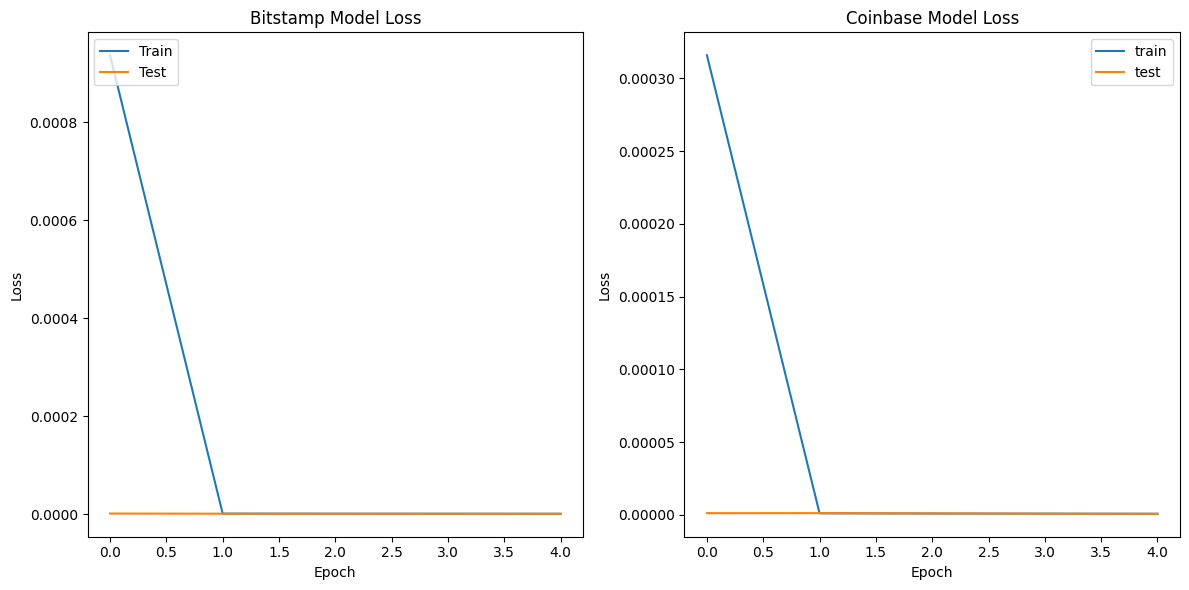

Models saved successfully!


In [7]:
#!/usr/bin/env python3

import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Masking
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load preprocessed data
bitstamp_data = np.load('/content/bitstamp_preprocessed_data_v2.npy')
coinbase_data = np.load('/content/coinbase_preprocessed_data_v2.npy')

# calculating the number of features
n = bitstamp_data.shape[1]
print(f"Number of features: {n}")

# printing a message to confirm that the data has been loaded:
print("Data loaded successfully.")

# prepare data for LSTM
# so this is assuming each time step uses 60 seconds of data
def prepare_data(data, timesteps):
 X, Y = [], []
 for i in range(len(data)-timesteps-1):
    X.append(data[i:(i+timesteps), :])
    Y.append(data[i+timesteps, 0]) # we only predicting the close price
 return np.array(X), np.array(Y)

timesteps = 60
bitstamp_X, bitstamp_y = prepare_data(bitstamp_data, timesteps)
coinbase_X, coinbase_y = prepare_data(coinbase_data, timesteps)

# splitting the data into a training set and a validation set
bitstamp_X_train, bitstamp_X_val, bitstamp_y_train, bitstamp_y_val = train_test_split(bitstamp_X, bitstamp_y, test_size=0.2)
coinbase_X_train, coinbase_X_val, coinbase_y_train, coinbase_y_val = train_test_split(coinbase_X, coinbase_y, test_size=0.2)

# creating the datasets
bitstamp_train_dataset = tf.data.Dataset.from_tensor_slices((bitstamp_X_train, bitstamp_y_train))
bitstamp_val_dataset = tf.data.Dataset.from_tensor_slices((bitstamp_X_val, bitstamp_y_val))

coinbase_train_dataset = tf.data.Dataset.from_tensor_slices((coinbase_X_train, coinbase_y_train))
coinbase_val_dataset = tf.data.Dataset.from_tensor_slices((coinbase_X_val, coinbase_y_val))

# printing a message to confirm that the datasets have been created:
print("Datasets created successfully.")

# defning LSTM model
def create_model():
    model = Sequential()
    model.add(LSTM(20, activation='tanh', input_shape=(timesteps, n)))
    model.add(Dense(1))

    # Custom Adam optimizer with a lower learning rate
    adam_optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)

    # Compile the model with the custom optimizer
    model.compile(optimizer=adam_optimizer, loss='mse')

    model.summary()
    return model

# Creating and training models
bitstamp_model = create_model()
coinbase_model = create_model()

# Model training
bitstamp_history = bitstamp_model.fit(bitstamp_train_dataset.batch(256), epochs=5, validation_data=bitstamp_val_dataset.batch(256), verbose=1)
coinbase_history = coinbase_model.fit(coinbase_train_dataset.batch(256), epochs=5, validation_data=coinbase_val_dataset.batch(256), verbose=1)

# printing the training and validation loss and accuracy:
print(bitstamp_model.history.history)

# plotting the training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bitstamp_history.history['loss'])
plt.plot(bitstamp_history.history['val_loss'])
plt.title('Bitstamp Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# plotting the training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(coinbase_history.history['loss'], label='train')
plt.plot(coinbase_history.history['val_loss'], label='test')
plt.title('Coinbase Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# saving the models
bitstamp_model.save('bitstamp_model_v2.h5')
coinbase_model.save('coinbase_model_v2.h5')

# printing a message to confirm that the models have been saved!!
print("Models saved successfully!")

# More Plotting for 60sec one:

12442/12442 [==============================] - 86s 7ms/step


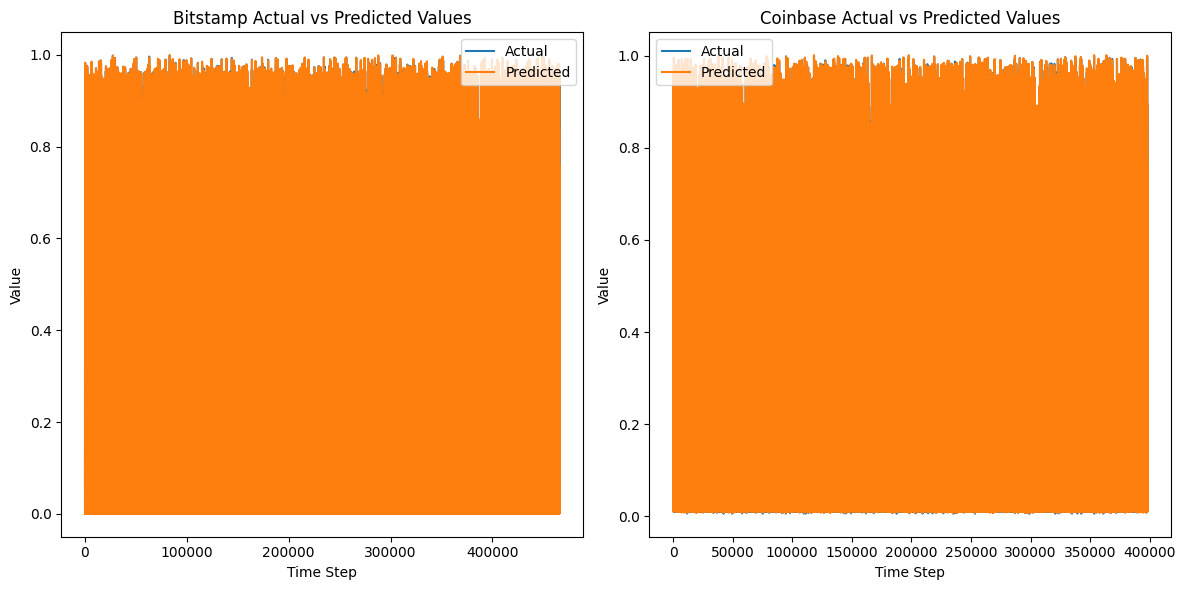

In [8]:
bitstamp_model = keras.models.load_model('bitstamp_model_v2.h5')
coinbase_model = keras.models.load_model('coinbase_model_v2.h5')

# Get the actual and predicted values
bitstamp_actual_values = bitstamp_y_val
bitstamp_predicted_values = bitstamp_model.predict(bitstamp_X_val)

coinbase_actual_values = coinbase_y_val
coinbase_predicted_values = coinbase_model.predict(coinbase_X_val)

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bitstamp_actual_values, label='Actual')
plt.plot(bitstamp_predicted_values, label='Predicted')
plt.title('Bitstamp Actual vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(coinbase_actual_values, label='Actual')
plt.plot(coinbase_predicted_values, label='Predicted')
plt.title('Coinbase Actual vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


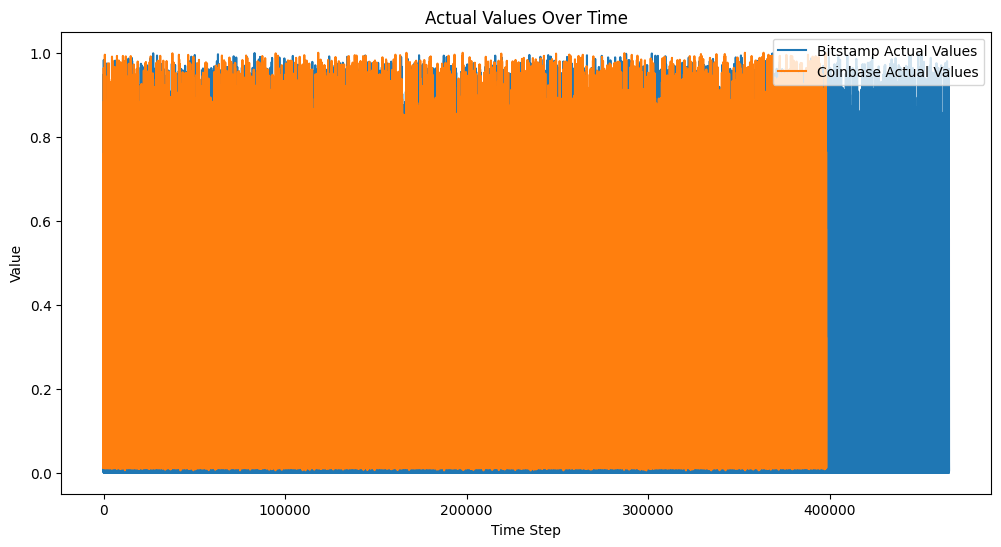

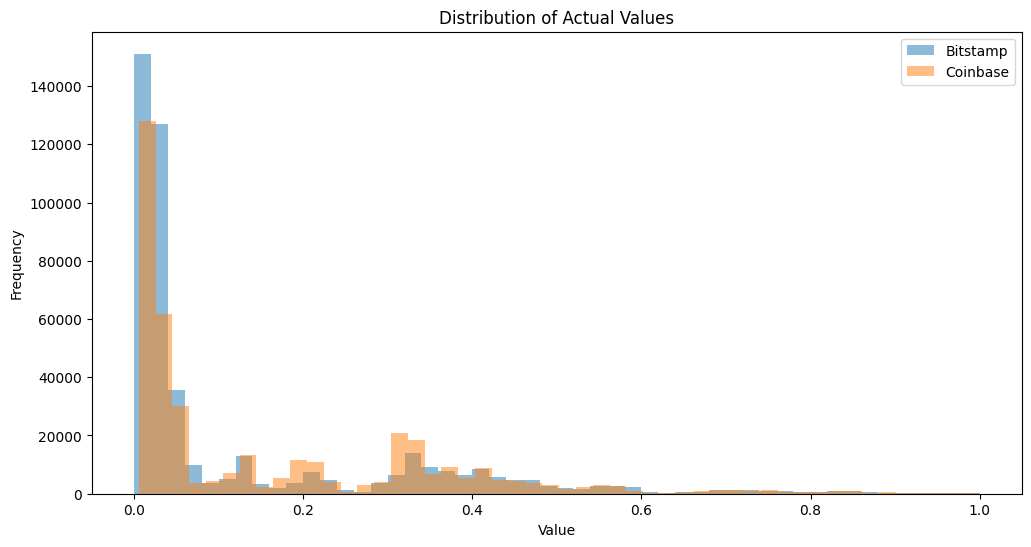

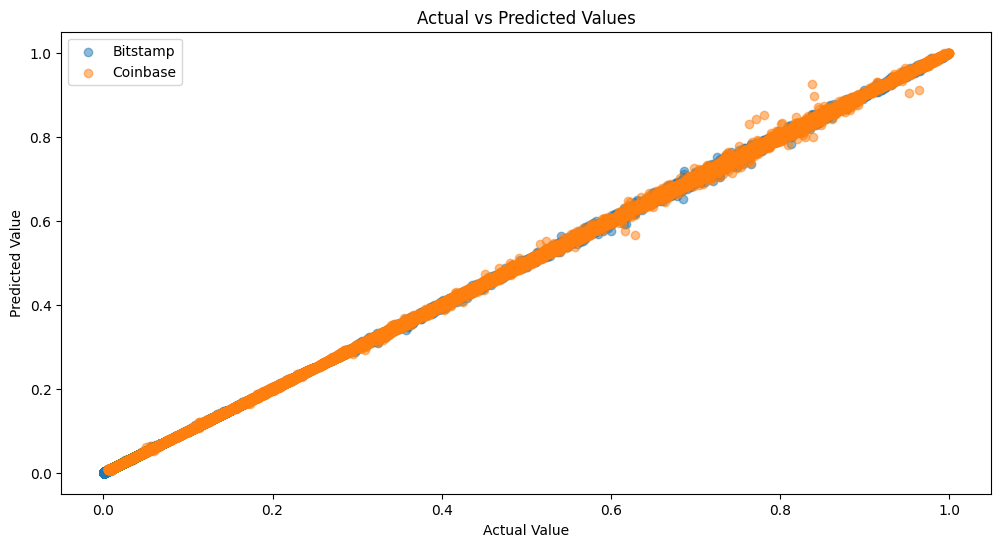

In [9]:
# Plot the actual values over time
plt.figure(figsize=(12, 6))
plt.plot(bitstamp_actual_values, label='Bitstamp Actual Values')
plt.plot(coinbase_actual_values, label='Coinbase Actual Values')
plt.title('Actual Values Over Time')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot a histogram of the actual values
plt.figure(figsize=(12, 6))
plt.hist(bitstamp_actual_values, bins=50, alpha=0.5, label='Bitstamp')
plt.hist(coinbase_actual_values, bins=50, alpha=0.5, label='Coinbase')
plt.title('Distribution of Actual Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Plot a scatter plot of the actual and predicted values
plt.figure(figsize=(12, 6))
plt.scatter(bitstamp_actual_values, bitstamp_predicted_values, alpha=0.5, label='Bitstamp')
plt.scatter(coinbase_actual_values, coinbase_predicted_values, alpha=0.5, label='Coinbase')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()
